# News Scrape Testing

In [1]:
import pandas as pd
import requests
import joblib

In [20]:
params = dict(
    api_token = 'sWUkybEMi8yjc49GmAajkS7LfTZrCN2KdBtR7sUn',
    symbols = 'AMZN',
    filter_entities = True,
    language = 'en',
    published_after = '2024-01-01',
)

url = 'https://api.marketaux.com/v1/news/all'

response = requests.get(url, params=params)

if response.status_code == 200:
    x = response.json()
    print("Data request successful!")
else:
    print(f"Error fetching data. Status code: {response.status_code}")

Data request successful!


In [23]:
x

{'meta': {'found': 3841, 'returned': 3, 'limit': 3, 'page': 1},
 'data': [{'uuid': '56012dbe-7c3b-44ec-823f-838b33e35414',
   'title': 'Apple, Tesla lifts stocks to higher close in light pre-holiday trading',
   'description': 'NEW YORK (July 2): Megacap growth stocks led by Appleand Tesla lifted the tech-heavy Nasdaq to a higher close on Monday, while the Dow and the S&P 500 also eked out slight gains in light pre-holiday trading.\n\nInvestors were waiting for U.S. labor market data due later this week for c...',
   'keywords': '',
   'snippet': 'NEW YORK (July 2): Megacap growth stocks led by Appleand Tesla lifted the tech-heavy Nasdaq to a higher close on Monday, while the Dow and the S&P 500 also eked...',
   'url': 'https://theedgemalaysia.com/node/717518',
   'image_url': 'https://theedgemalaysia.com/apple-touch-icon.png',
   'language': 'en',
   'published_at': '2024-07-01T22:40:19.000000Z',
   'source': 'theedgemarkets.com',
   'relevance_score': None,
   'entities': [{'symbol'

In [4]:
# joblib.dump(data, '../data/0-external/test-news-scrape.json')

In [5]:
data = joblib.load('../data/0-external/test-news-scrape.json')['data']
data

[{'uuid': '56012dbe-7c3b-44ec-823f-838b33e35414',
  'title': 'Apple, Tesla lifts stocks to higher close in light pre-holiday trading',
  'description': 'NEW YORK (July 2): Megacap growth stocks led by Appleand Tesla lifted the tech-heavy Nasdaq to a higher close on Monday, while the Dow and the S&P 500 also eked out slight gains in light pre-holiday trading.\n\nInvestors were waiting for U.S. labor market data due later this week for c...',
  'keywords': '',
  'snippet': 'NEW YORK (July 2): Megacap growth stocks led by Appleand Tesla lifted the tech-heavy Nasdaq to a higher close on Monday, while the Dow and the S&P 500 also eked...',
  'url': 'https://theedgemalaysia.com/node/717518',
  'image_url': 'https://theedgemalaysia.com/apple-touch-icon.png',
  'language': 'en',
  'published_at': '2024-07-01T22:40:19.000000Z',
  'source': 'theedgemarkets.com',
  'relevance_score': None,
  'entities': [{'symbol': 'AAPL',
    'name': 'Apple Inc.',
    'exchange': None,
    'exchange_long': None,

In [7]:
entities = [item['entities'][0]['name'] for item in data]
published = [item['published_at'] for item in data]
titles = [item['title'] for item in data]
descriptions = [item['description'] for item in data]
snippets = [item['snippet'] for item in data]

df = pd.DataFrame({'entity': entities,
                   'published': published, 
                   'title': titles,
                   'description': descriptions,
                   'snippet': snippets})

In [11]:
display(df)

,entity,published,title,description,snippet
0,Apple Inc.,2024-07-01T22:40:19.000000Z,"Apple, Tesla lifts stocks to higher close in l...",NEW YORK (July 2): Megacap growth stocks led b...,NEW YORK (July 2): Megacap growth stocks led b...
1,Apple Inc.,2024-07-01T22:32:20.000000Z,"Market Today: Paramount in Merger Talks, IBM-M...",Market Performance\nThe Dow Jones Industrial A...,Market Performance\n\nThe Dow Jones Industrial...
2,Apple Inc.,2024-07-01T21:37:23.000000Z,Markets live: ASX to slip ahead of Reserve Ban...,The Australian share market is likely to start...,The Australian share market is likely to fall ...


## EODHD

In [12]:
params = {
    'api_token' : '66836eb569cbe7.74196692',
    's' : 'AMZN',
    'from' : '2024-01-01',
    'to' : '2024-07-01',
    'limit' : 1000,
}

url = 'https://eodhd.com/api/news'

response = requests.get(url, params)

if response.status_code == 200:
    x = response.json()
    print("Data request successful!")
else:
    print(f"Error fetching data. Status code: {response.status_code}")

Data request successful!


In [13]:
data = x
dates = [item['date'] for item in data]
titles = [item['title'] for item in data]
content = [item['content'] for item in data]
symbols = [item['symbols'] for item in data]

df = pd.DataFrame({
    'date': dates,
    'title': titles,
    'content': content,
    'symbols': symbols
})

In [14]:
print(df.shape)

(1000, 4)


In [10]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,title,content,symbols
0,2024-07-02 11:30:00+00:00,2 Millionaire-Maker Artificial Intelligence (A...,There are about 24 million millionaires in the...,"[AMZN.US, CRWD.US]"
1,2024-07-02 11:27:15+00:00,Is Amazon.com Inc (NASDAQ:AMZN) the Best AI Mo...,We recently published a list of the 10 Best AI...,"[0R1O.IL, 1AMZN.MI, AMZ.DU, AMZ.F, AMZ.HM, AMZ..."
2,2024-07-02 09:00:13+00:00,AI meets 'Do no harm': Healthcare grapples wit...,Major companies are moving at high speed to ca...,"[0QYP.IL, 0R1O.IL, 0RIH.IL, 1AMZN.MI, 1GOOG.MI..."
3,2024-07-02 08:49:00+00:00,Meet the Unstoppable Stock That Just Joined Nv...,Six American companies have a valuation of at ...,"[AMZN.US, ORCL.US]"
4,2024-07-02 00:00:00+00:00,3 Cloud Infrastructure Plays Growing 50%+ Desp...,Don't miss out on these innovative cloud infra...,"[AMZN.US, GOOG.US, GOOGL.US, IBM.US]"


<Axes: >

2024-05-07 10:49:00+00:00


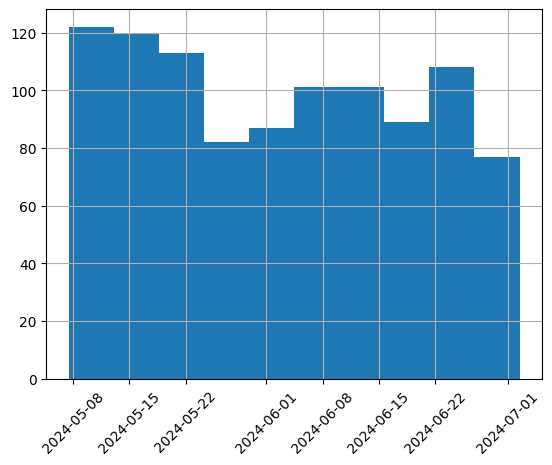

In [11]:
display(df['date'].hist(xrot=45))
print(df.date.min())